# Data analysis on Cuisine rating of Restaurants

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Cuisine_rating.csv')
data

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
Area code,200.0,141.060,26.130257,101.0,123.00,135.0,158.00,199.0
YOB,200.0,1984.830,16.809339,1955.0,1971.00,1987.0,2000.00,2009.0
Budget,200.0,3.815,1.056578,1.0,3.00,4.0,5.00,5.0
Food Rating,200.0,3.220,1.411226,1.0,2.00,3.0,5.00,5.0
Service Rating,200.0,3.230,1.526022,1.0,2.00,3.0,5.00,5.0
Overall Rating,200.0,3.225,1.079445,1.0,2.50,3.0,4.00,5.0


In [5]:
data.shape

(200, 15)

In [6]:
data.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

In [7]:
data.rename(columns={'Food Rating':'FoodRating', 'Service Rating':'ServiceRating', 'Overall Rating':'OverallRating'}, inplace=True)

In [8]:
data.isnull().mean()*100

User ID           0.0
Area code         0.0
Location          0.0
Gender            0.0
YOB               0.0
Marital Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
FoodRating        0.0
ServiceRating     0.0
OverallRating     0.0
Often A S         0.0
dtype: float64

In [9]:
data.duplicated().sum()

0

In [10]:
data.drop_duplicates(inplace=True)
data.head(10)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
5,6,111,"China Town, NY",Male,1995,Single,Student,5,Seafood,Never,Never,5,1,3.0,No
6,7,111,"China Town, NY",Female,1977,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No
7,8,153,"Upper East Side,NY",Female,2003,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes
8,9,107,"Riverdale,NY",Male,1965,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No
9,10,129,"Central Park,NY",Male,1995,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes


In [11]:
data['Age'] = [(2022 - YOB) for YOB in data['YOB']]
data.head(10)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often A S,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25
5,6,111,"China Town, NY",Male,1995,Single,Student,5,Seafood,Never,Never,5,1,3.0,No,27
6,7,111,"China Town, NY",Female,1977,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,45
7,8,153,"Upper East Side,NY",Female,2003,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19
8,9,107,"Riverdale,NY",Male,1965,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No,57
9,10,129,"Central Park,NY",Male,1995,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes,27


### Droping the unwanted columns

In [12]:
data.drop(columns=['User ID', 'Area code', 'YOB'], inplace=True)
data.head(10)

,Location,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often A S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25
5,"China Town, NY",Male,Single,Student,5,Seafood,Never,Never,5,1,3.0,No,27
6,"China Town, NY",Female,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,45
7,"Upper East Side,NY",Female,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19
8,"Riverdale,NY",Male,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No,57
9,"Central Park,NY",Male,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes,27


### Univariate analysis

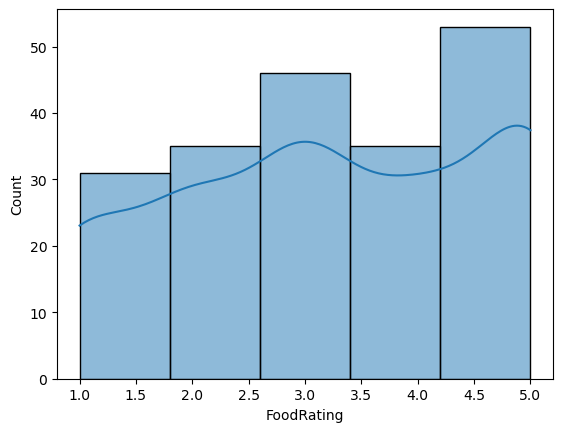

In [15]:
sns.histplot(data=data, x='FoodRating', bins=5,kde=True)
plt.show()

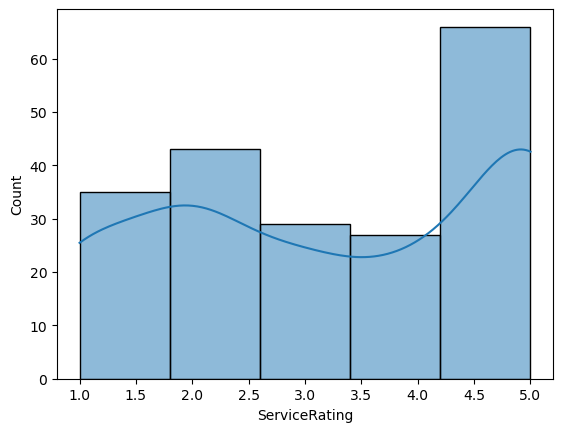

In [16]:
sns.histplot(data=data, x='ServiceRating',bins=5,kde=True)
plt.show()

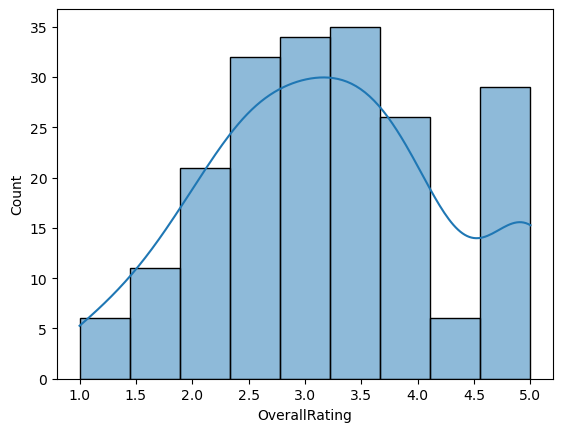

In [17]:
sns.histplot(data=data, x='OverallRating',kde=True)
plt.show()

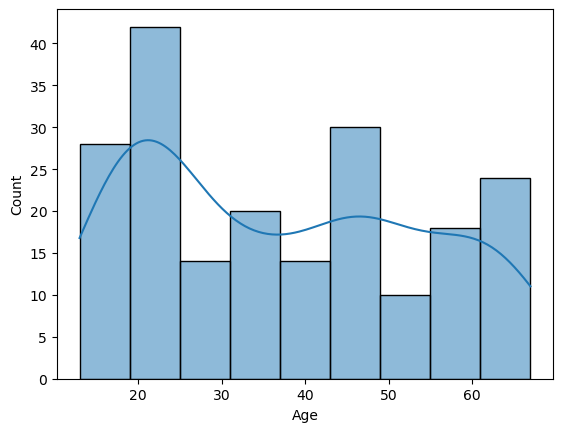

In [18]:
sns.histplot(data=data, x='Age',kde=True)
plt.show()

#### Box plot

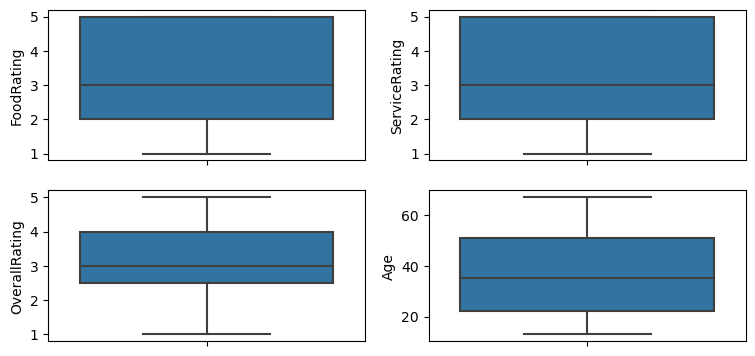

In [19]:
plt.figure(figsize=(9,9))
plt.subplot(4,2,1)
sns.boxplot(data=data, y='FoodRating')

plt.subplot(4,2,2)
sns.boxplot(data=data, y='ServiceRating')

plt.subplot(4,2,3)
sns.boxplot(data=data, y='OverallRating')

plt.subplot(4,2,4)
sns.boxplot(data=data, y='Age')
plt.show()

### Multivariate analysis

#### Count plots

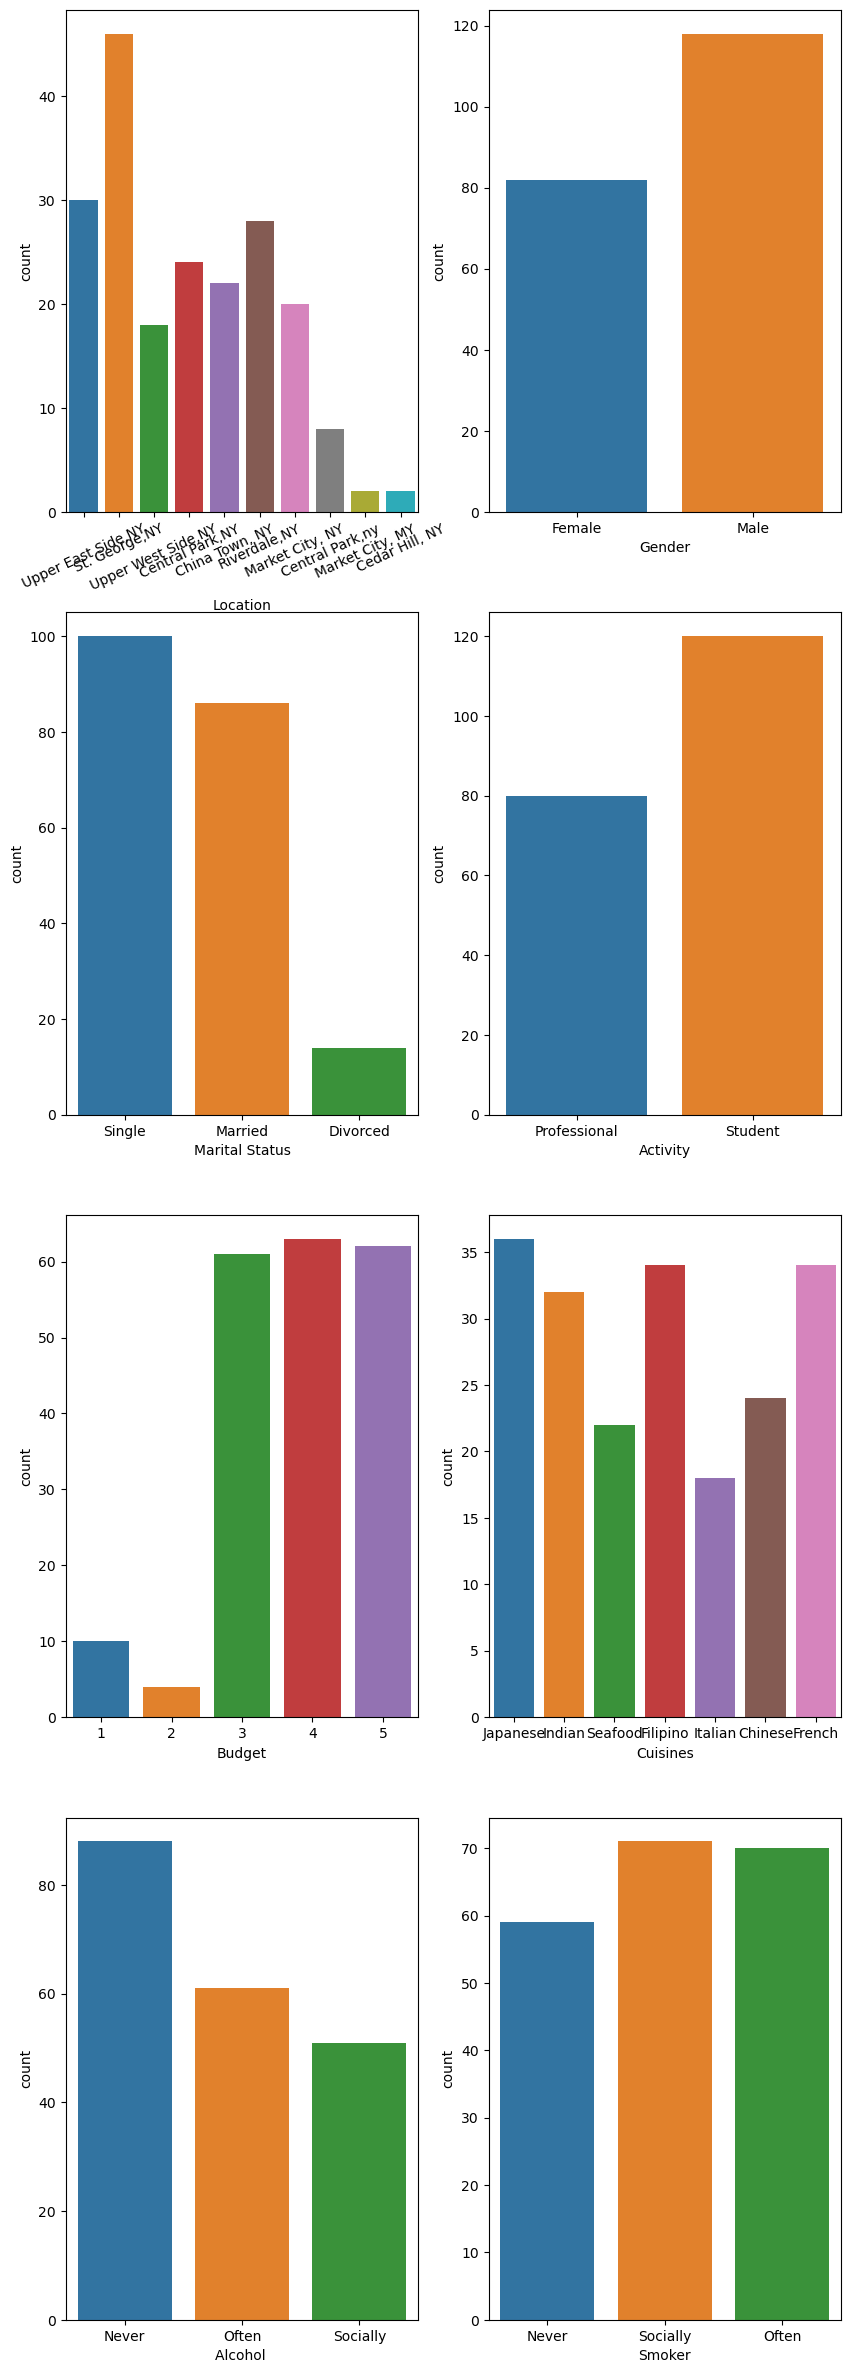

In [20]:
plt.figure(figsize=(10,30))
plt.subplot(4,2,1)
plt.xticks(rotation = 25)
sns.countplot(data=data, x='Location')

plt.subplot(4,2,2)
sns.countplot(data=data, x='Gender')

plt.subplot(4,2,3)
sns.countplot(data=data, x='Marital Status')

plt.subplot(4,2,4)
sns.countplot(data=data, x='Activity')

plt.subplot(4,2,5)
sns.countplot(data=data, x='Budget')

plt.subplot(4,2,6)
sns.countplot(data=data, x='Cuisines')

plt.subplot(4,2,7)
sns.countplot(data=data, x='Alcohol ')

plt.subplot(4,2,8)
sns.countplot(data=data, x='Smoker')

plt.show()

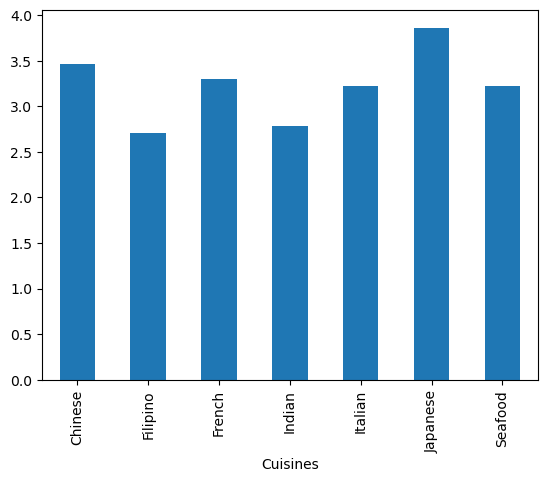

In [21]:
food_cuisines = data.groupby(['Cuisines'])['FoodRating'].mean()
food_cuisines.plot.bar();

### Custom function to create location wise dataframe 

In [22]:
def sort_location(Location):
    data_location = data[data.Location == Location]
    data_location.drop(columns='Location', inplace=True)
    return data_location

In [23]:
Upper_East_Side_NY =sort_location('Upper East Side,NY')

In [24]:
Upper_East_Side_NY

,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often A S,Age
0,Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
3,Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
7,Female,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19
15,Female,Married,Student,3,French,Often,Never,4,1,2.5,No,66
17,Male,Single,Student,3,Japanese,Often,Often,1,5,3.0,Yes,18
21,Female,Married,Professional,5,Italian,Socially,Never,1,4,2.5,No,39
38,Male,Married,Student,4,French,Never,Never,2,3,2.5,No,35
51,Female,Single,Student,3,Chinese,Often,Socially,3,2,2.5,No,17
52,Female,Single,Professional,4,Chinese,Never,Often,3,5,4.0,No,48
63,Female,Married,Student,5,Italian,Never,Socially,1,1,1.0,No,33


In [25]:
St_George_NY=sort_location('St. George,NY')

In [26]:
St_George_NY

,Gender,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often A S,Age
1,Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
10,Female,Married,Professional,4,French,Never,Often,3,2,2.5,No,47
11,Male,Married,Student,4,Chinese,Never,Socially,3,1,2.0,No,59
12,Female,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No,16
20,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
25,Male,Single,Professional,3,Japanese,Never,Socially,4,3,3.5,No,53
37,Female,Single,Student,5,French,Never,Never,3,2,2.5,No,32
39,Male,Single,Student,4,Filipino,Never,Never,3,1,2.0,No,36
42,Male,Married,Student,5,Japanese,Never,Never,3,1,2.0,No,37
44,Female,Married,Professional,3,Italian,Often,Never,4,1,2.5,No,53


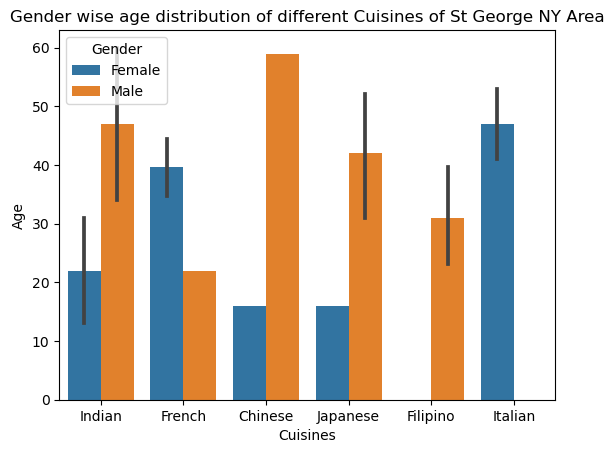

In [27]:
plt.title('Gender wise age distribution of different Cuisines of St George NY Area')
sns.barplot(x='Cuisines', y='Age', data=St_George_NY, hue='Gender')
plt.show()

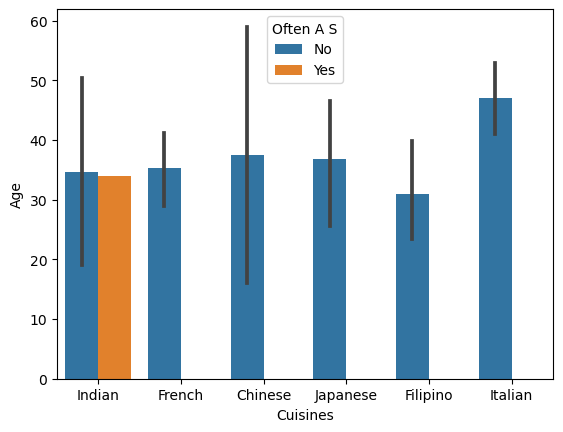

In [28]:
sns.barplot(x='Cuisines', y='Age', data=St_George_NY, hue='Often A S')
plt.show()